## Introduction

The Central Limit Theorem (CLT) states in part that the distribution of mean values from samples of any statistical distribution is itself a Normal distribution. Let's see this in action.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import normaltest

## Functions

In [2]:
def sample(size=500, distro='beta', seed=None):
    '''returns sample from population of user-defined statistical distribution'''
    np.random.seed(seed)
    if distro == 'beta':
        return np.random.beta(a=2.31, b=0.627, size=size)
    elif distro == 'normal':
        return np.random.normal(size=size)
    elif distro == 'chisquare':
        return np.random.chisquare(df=10, size=size)
    else:
        print('Choose beta, normal, or chisquare')
    
def dist_plot(sample, title=None):
    '''returns KDE plot showing sample distribution'''
    sns.kdeplot(sample);
    if title:
        plt.title(title);
        
def avg_sampling(n_samples=1000, distro='beta', seed=30):
    '''returns average for n_samples'''
    np.random.seed(seed)
    return [np.mean(sample(size=100, distro=distro)) for _ in range(n_samples)]

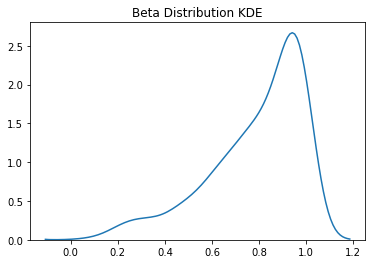

In [3]:
dist_plot(sample(distro='beta', seed=60), title='Beta Distribution KDE')

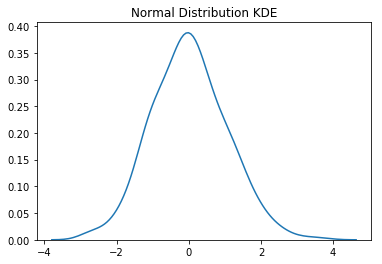

In [4]:
dist_plot(sample(distro='normal', seed=60), title='Normal Distribution KDE')

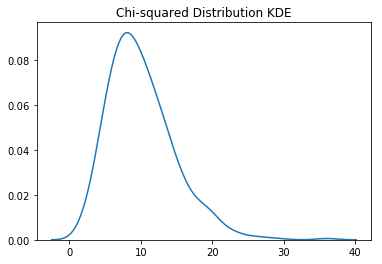

In [5]:
dist_plot(sample(distro='chisquare', seed=60), title='Chi-squared Distribution KDE')

## Central Limit Theorem

In this section we will draw samples from three different distributions and test whether the resulting distribution of averages is itself Normal. The null hypothesis is that the distribution is Normal.

NormaltestResult(statistic=1.6425137206076352, pvalue=0.43987844117167163)

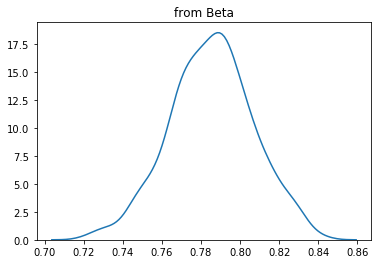

In [6]:
beta = avg_sampling(n_samples=1000, distro='beta')
dist_plot(beta, title='from Beta')
normaltest(beta)

NormaltestResult(statistic=2.3054901443973517, pvalue=0.31576877049122137)

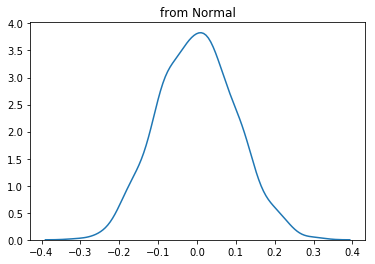

In [7]:
normal = avg_sampling(n_samples=1000, distro='normal')
dist_plot(normal, title='from Normal')
normaltest(normal)

NormaltestResult(statistic=2.9443112081937506, pvalue=0.22943039067446885)

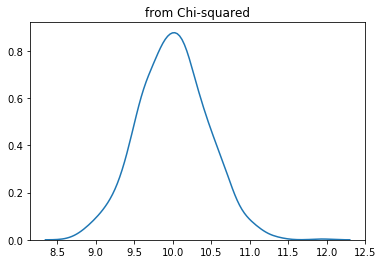

In [8]:
chi2 = avg_sampling(n_samples=1000, distro='chisquare')
dist_plot(chi2, title='from Chi-squared')
normaltest(chi2)

## Summary

The resulting distribution of drawing a large number of random samples from **any** population of a statistical distribution and taking the average of each sample is Normal (aka Gaussian)!